In [2]:
from PIL import Image
import numpy as np

def load_color_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_rgb = np.array(img, dtype=np.uint8)
    return img_rgb



In [3]:
def extract_rgb_channels(img_rgb):
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]
    return R, G, B


In [4]:
def store_pixel_rgb(img_rgb):
    H, W, _ = img_rgb.shape
    pixel_list = []

    for i in range(H):
        for j in range(W):
            r, g, b = img_rgb[i, j]
            pixel_list.append((i, j, int(r), int(g), int(b)))

    return pixel_list


In [5]:
def int_to_8bit_binary(value):
    return format(int(value), '08b')


def rgb_pixel_to_8bit(rgb_pixel):
    r, g, b = rgb_pixel
    return (
        int_to_8bit_binary(r),
        int_to_8bit_binary(g),
        int_to_8bit_binary(b)
    )


def image_rgb_to_8bit(img_rgb):
    H, W, _ = img_rgb.shape
    img_bin = [[[None, None, None] for _ in range(W)] for _ in range(H)]

    for i in range(H):
        for j in range(W):
            r, g, b = img_rgb[i, j]
            img_bin[i][j][0] = int_to_8bit_binary(r)
            img_bin[i][j][1] = int_to_8bit_binary(g)
            img_bin[i][j][2] = int_to_8bit_binary(b)

    return img_bin


In [6]:
def preprocess_cover_to_8bit(image_path):
    img_rgb= load_color_image(image_path)
    img_bin= image_rgb_to_8bit(img_rgb)
    return img_bin

In [8]:
img_bin = preprocess_cover_to_8bit("cover_4x4.jpg")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_cover_image(cover_img_bin, title="Cover Image", save_path=None):

    H = len(cover_img_bin)
    W = len(cover_img_bin[0])

    img = np.zeros((H, W, 3), dtype=np.uint8)

    for i in range(H):
        for j in range(W):
            img[i, j, 0] = int(cover_img_bin[i][j][0], 2)  # R
            img[i, j, 1] = int(cover_img_bin[i][j][1], 2)  # G
            img[i, j, 2] = int(cover_img_bin[i][j][2], 2)  # B

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)

    plt.show()


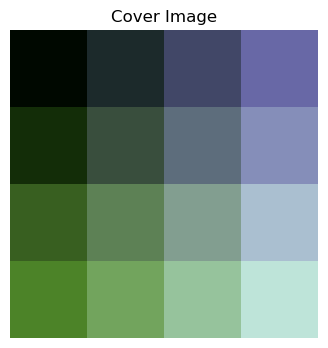

In [10]:
display_cover_image(img_bin,"Cover Image")